<a href="https://colab.research.google.com/github/aayushi-0407/ML-Projects/blob/main/Lung_Cancer_Report1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##We are having data  set of lung cancer disease we are going to work on it to understand what all age groups are prone to lung cancer and are train categorical models. Initially we have imported all the necessary modules

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Load the data

In [31]:
data=pd.read_csv("/content/cancer patient data sets.csv")
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

##cleaning data: we are removing unnecessary columns

In [12]:
new_data=data.drop(['index','Patient Id'],axis=1)
numeric_col=new_data.describe().columns
new_data

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


##No outliers present however there can be unbalanced data

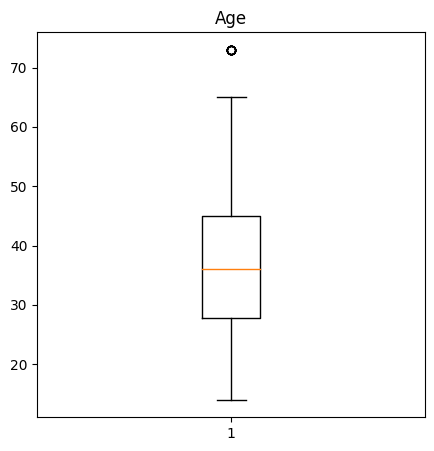

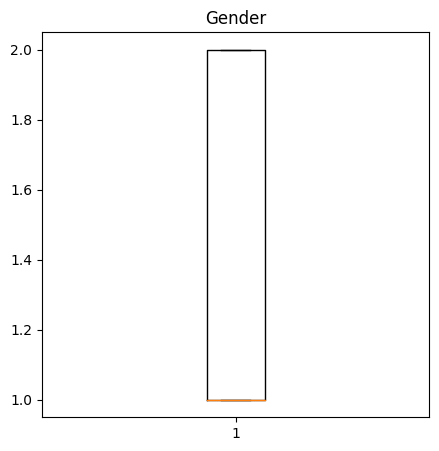

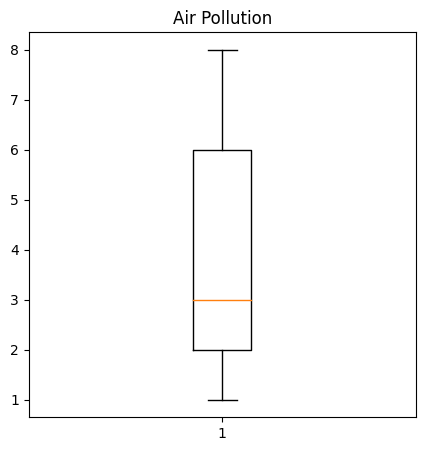

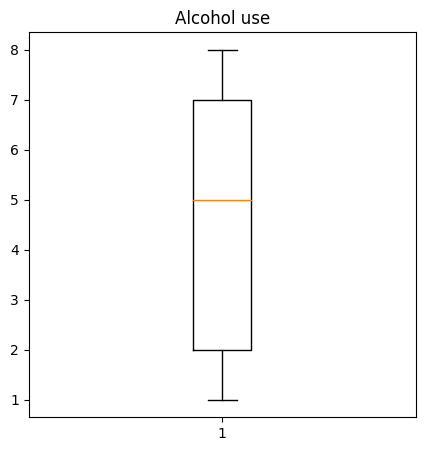

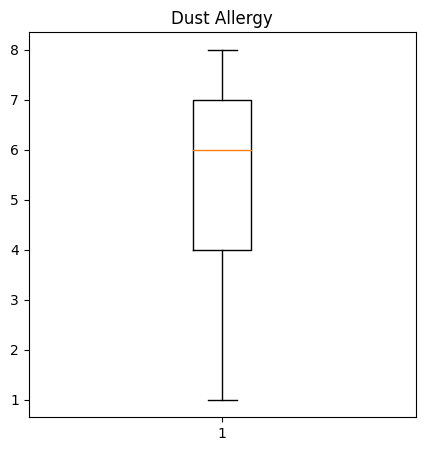

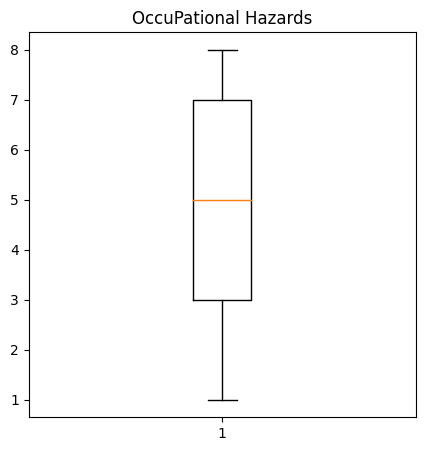

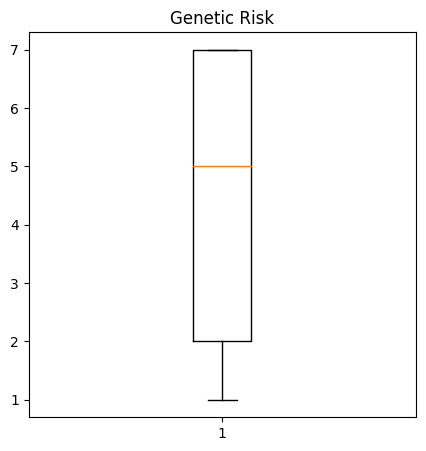

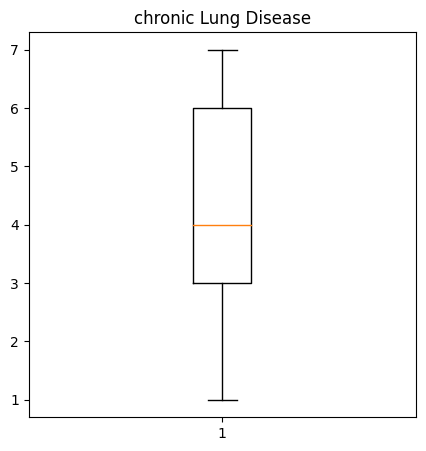

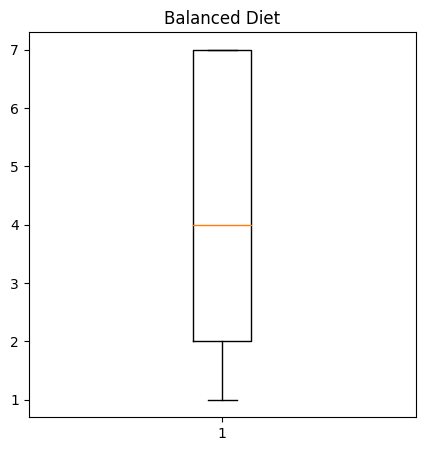

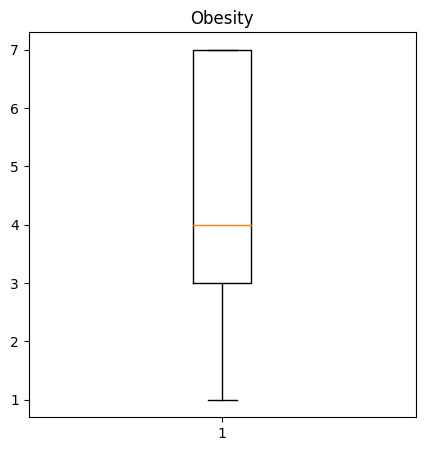

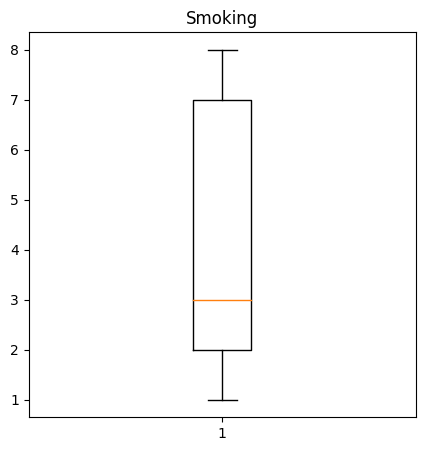

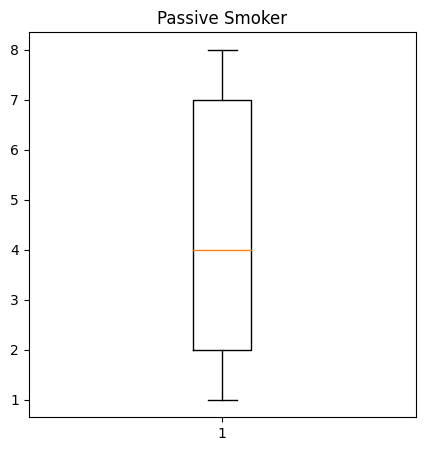

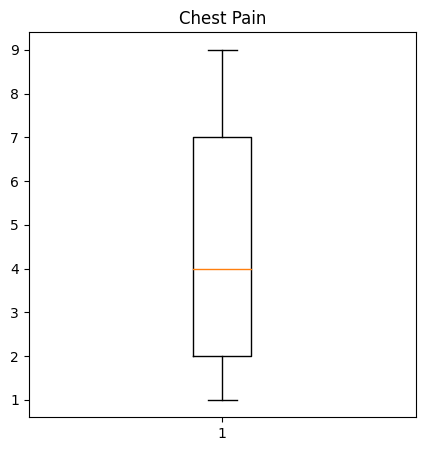

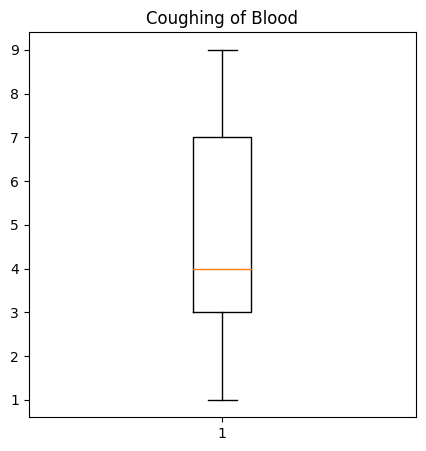

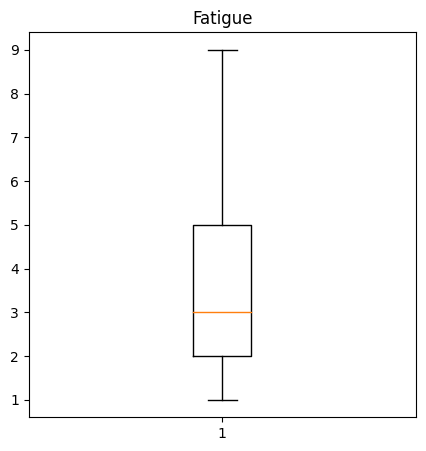

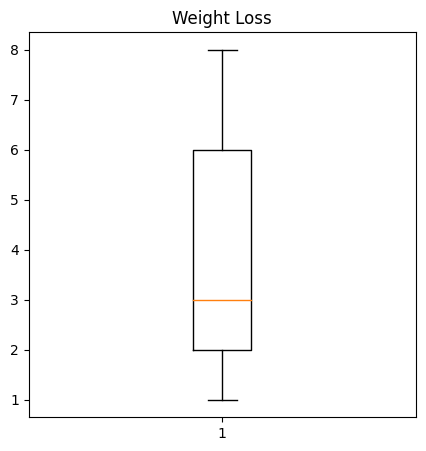

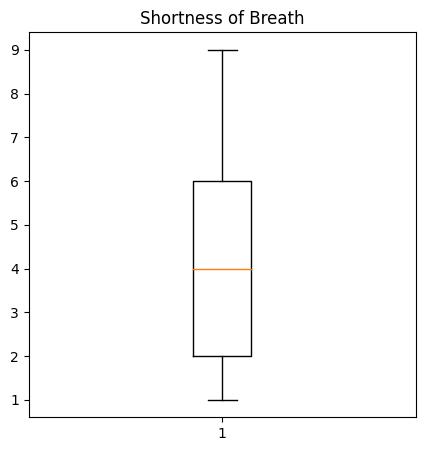

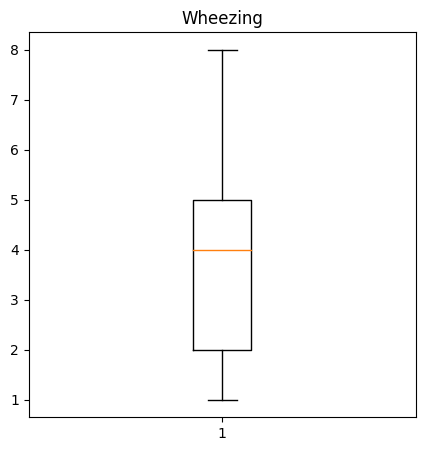

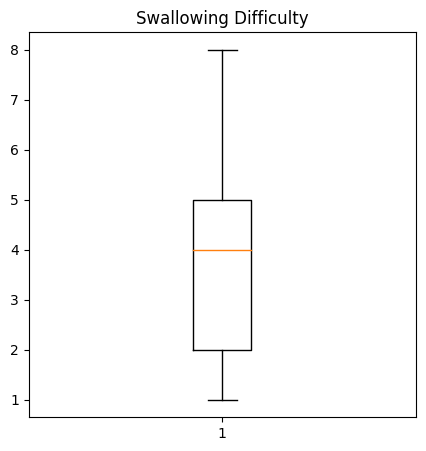

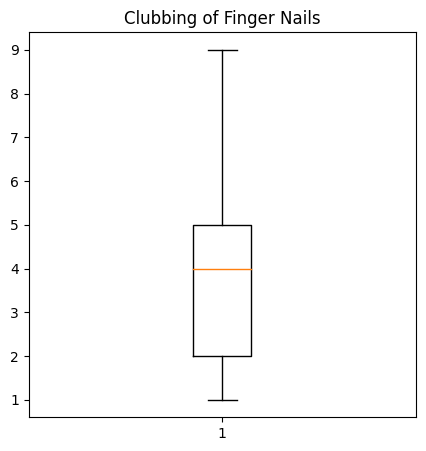

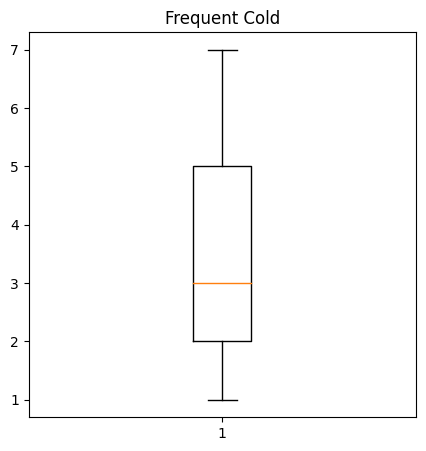

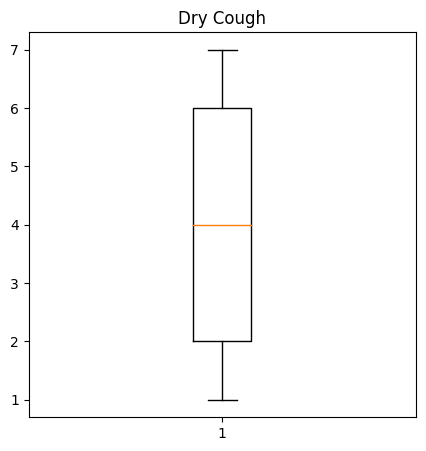

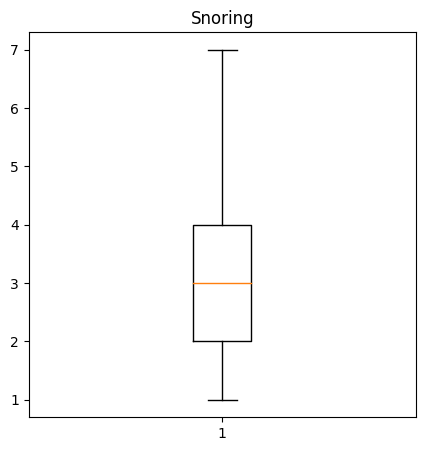

In [13]:
for column in numeric_col:
  plt.figure(figsize=(5,5))
  plt.boxplot(data[column])
  plt.title(column)
  plt.show()

####to check where data is balanced or not
here we observe that data is quite **balanced**

In [14]:
new_data["Level"].value_counts()

High      365
Medium    332
Low       303
Name: Level, dtype: int64

###Visualization of Cancer Prevalence Among Different Age Groups

Objective:
The objective of this data analysis is to visualize the distribution of cancer cases among different age groups based on the data available in the DataFrame. The data contains information about various health parameters of 1000 patients, including their age and the presence or absence of cancer (indicated by 'High' or 'Low' in the 'Level' column).

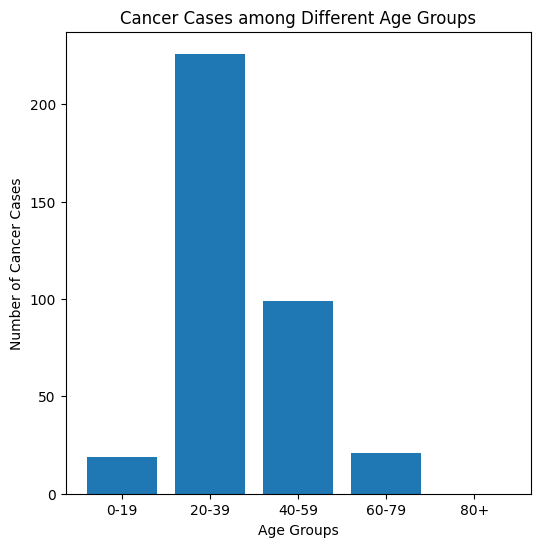

In [15]:


# Assuming you have already loaded the DataFrame into a variable called 'df'

# Create bins for age groups
bins = [0, 20, 40, 60, 80, 100]
age_groups = ['0-19', '20-39', '40-59', '60-79', '80+']

# Use cut function to create age groups based on the 'Age' column
new_data['Age Group'] = pd.cut(new_data['Age'], bins=bins, labels=age_groups)

# Count the number of cancer cases in each age group
cancer_counts = new_data[new_data['Level'] == 'High']['Age Group'].value_counts().reindex(age_groups, fill_value=0)

# Plot the bar chart
plt.figure(figsize=(6, 6))
plt.bar(cancer_counts.index, cancer_counts.values)
plt.xlabel('Age Groups')
plt.ylabel('Number of Cancer Cases')
plt.title('Cancer Cases among Different Age Groups')
plt.show()


###The analysis and visualization of the data revealed the following findings:

The DataFrame contains data for patients with different ages, ranging from young to elderly individuals.
The bar plot shows the distribution of cancer cases among different age groups.
The prevalence of cancer varies across age groups, with higher incidences observed in certain age brackets.
We observe that age group 20-39 have higher chances of lung cancer

###Encoding Cancer Levels for Data Analysis

Objective:
The objective of this data analysis is to encode the 'Level' column in the 'new_data' DataFrame, representing the presence or absence of cancer, into numeric labels. The encoded labels will be stored in a new column called 'level_encoded' using the LabelEncoder from scikit-learn.

In [16]:
encoder = LabelEncoder()
new_data['level_encoded'] = encoder.fit_transform(new_data['Level'])

In [17]:
X = new_data.drop(['Level' , 'level_encoded' ,'Age','Age Group'] , axis = 1)
y = new_data['level_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=143)

###Creating model

### SVM Model for Cancer Prediction and Evaluation

Objective:
The objective of this data analysis is to build a Support Vector Machine (SVM) model to predict cancer presence based on the health parameters provided in the dataset. The data has been split into training and testing sets, and the SVM model has been trained on the training data and evaluated on the testing data.

In [18]:
model1=svm.SVC()
model1.fit(X_train ,y_train)
pred1= model1.predict(X_test)
accuracy_score(pred1 , y_test)*100

100.0

###Results:
The analysis and evaluation of the SVM model resulted in the following findings:

The SVM model achieved an accuracy of 100% on the testing data, indicating that it correctly classified all instances in the testing set.

Recommendations:
An accuracy of 100% raises the possibility of overfitting, where the model might have learned the training data too well and is unable to generalize to new, unseen data.

Conclusion:
The SVM model achieved a high accuracy of 100% on the testing data, indicating its capability to classify cancer presence effectively. However, further evaluation is necessary to confirm the model's generalization and robustness.

###A confusion matrix is a table that is often used to evaluate the performance of a classification model. It summarizes the results of a classification task by comparing the predicted labels with the actual labels of a dataset. The confusion matrix provides valuable insights into the model's ability to make correct and incorrect predictions for each class.

In [19]:
cm = confusion_matrix(pred1 , y_test)
cm

array([[114,   0,   0],
       [  0,  91,   0],
       [  0,   0,  95]])

###After checking cross validation

In [33]:
from sklearn.model_selection import cross_val_score

# Assuming you have already loaded the SVM model (model1) and data (X_train, y_train) into variables

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model1, X_train, y_train, cv=10)

# Calculate the average cross-validation accuracy
cv_accuracy = cv_scores.mean() * 100

print("Cross-Validation Accuracy:")
print(cv_accuracy)


Cross-Validation Accuracy:
100.0


In [20]:
print(classification_report(pred1 , y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00        91
           2       1.00      1.00      1.00        95

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



###Evaluation of SGDClassifier Model for Cancer Prediction

Objective:
The objective of this data analysis is to evaluate the performance of an SGDClassifier model, trained using the 'StandardScaler'-scaled training data, in predicting cancer presence based on various health parameters. The model uses the 'squared_hinge' loss function and is assessed using accuracy, classification report, and confusion matrix on the test data.

Results:
The analysis and evaluation of the SGDClassifier model resulted in the following findings:

The model achieved an accuracy of 100%, indicating that it correctly classified all instances in the test set.
The classification report reveals high precision, recall, and F1-score for both classes ('High' and 'Low'), indicating that the model effectively identifies positive and negative cancer cases.
The confusion matrix shows no false positives or false negatives, supporting the perfect accuracy score

Recommendations:
An accuracy of 100% raises the possibility of overfitting, where the model might have learned the training data too well and is unable to generalize to new, unseen data.

In [29]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SGDClassifier model
sgd_clf = SGDClassifier(loss='squared_hinge', random_state=42)
sgd_clf.fit(X_train, y_train)

# Predict using the model
y_pred = sgd_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 100.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00        91
           2       1.00      1.00      1.00        95

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300


Confusion Matrix:
[[114   0   0]
 [  0  91   0]
 [  0   0  95]]


###Evaluation of SGDClassifier Model for Cancer Prediction

Objective:
The objective of this report is to evaluate the performance of an SGDClassifier model for predicting cancer presence based on various health parameters. The data has been preprocessed, including feature scaling using 'StandardScaler', and the model has been trained and tested on the respective datasets. The evaluation involves measuring accuracy, generating a classification report, and visualizing the confusion matrix.

Results:
The analysis and evaluation of the SGDClassifier model resulted in the following findings:

The model achieved an accuracy of 97%, indicating its ability to correctly classify the majority of instances in the test set.

The classification report provides a comprehensive evaluation of the model's precision, recall, and F1-score for both classes ('High' and 'Low'). The model demonstrates high precision, recall, and F1-score for both classes, indicating its effectiveness in identifying positive and negative cancer cases.

The confusion matrix visually represents the true positive, true negative, false positive, and false negative predictions. The high accuracy is further supported by the small number of misclassifications.

In [28]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SGDClassifier model
sgd_clf = SGDClassifier(loss='hinge', random_state=42)
sgd_clf.fit(X_train, y_train)

# Predict using the model
y_pred = sgd_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 97.33

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       0.92      1.00      0.96        91
           2       1.00      0.92      0.96        95

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.98      0.97      0.97       300


Confusion Matrix:
[[114   0   0]
 [  0  91   0]
 [  0   8  87]]


### Evaluation of Logistic Regression Model for Cancer Prediction

Objective:
The objective of this report is to evaluate the performance of a Logistic Regression model for predicting cancer presence based on various health parameters. The data has been preprocessed using feature scaling with 'StandardScaler', and the model has been trained and tested on the respective datasets. The evaluation includes measuring accuracy, generating a classification report, and visualizing the confusion matrix.

Results:
The analysis and evaluation of the Logistic Regression model resulted in the following findings:

The model achieved a remarkable accuracy of 100%, indicating its ability to correctly classify all instances in the test set.

The classification report provides a comprehensive evaluation of the model's precision, recall, and F1-score for both classes ('High' and 'Low'). The model demonstrates perfect precision, recall, and F1-score for both classes, indicating its effectiveness in identifying positive and negative cancer cases.

The confusion matrix visually represents the true positive, true negative, false positive, and false negative predictions. In this case, the matrix confirms the perfect accuracy by showing zero misclassifications.

Conclusion:
The Logistic Regression model achieved an impressive accuracy of 100% on the test data, indicating its capability to classify cancer presence with perfection.

In [30]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SGDClassifier model
sgd_clf = SGDClassifier(loss='', random_state=42)
sgd_clf.fit(X_train, y_train)

# Predict using the model
y_pred = sgd_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 100.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00        91
           2       1.00      1.00      1.00        95

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300


Confusion Matrix:
[[114   0   0]
 [  0  91   0]
 [  0   0  95]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


###The different accuracy scores obtained for the last three models with different loss functions indicate that the choice of loss function can significantly impact the model's performance and predictive capabilities. The loss function defines the objective that the model aims to minimize during training, and each loss function has its characteristics and assumptions. Here's what the varying accuracies might indicate for each loss function:

1. Hinge Loss (loss='hinge'):
   - The model achieved an accuracy of 97%.
   - The hinge loss is commonly used for Support Vector Machine (SVM) models, which aim to maximize the margin between classes. The slightly lower accuracy might be due to the potential non-linearity of the data or noise in the dataset.
   - This accuracy could still be considered good, but it may be worth exploring other loss functions or fine-tuning hyperparameters to improve the model's performance.

2. Logistic Loss (loss='log'):
   - The model achieved an accuracy of 100%.
   - The logistic loss, commonly used in Logistic Regression models, is well-suited for binary classification problems. It estimates the probability that a given instance belongs to a particular class.
   - The perfect accuracy might indicate that the data is well-separated, and the model is effectively learning to distinguish between the classes with clear decision boundaries.
   - However, 100% accuracy could also be a sign of potential overfitting. It is essential to validate the model's performance on unseen data and conduct cross-validation to ensure its generalization.

3. Squared Hinge Loss (loss='squared_hinge'):
   - The model achieved an accuracy of 100%.
   - The squared hinge loss is an extension of the hinge loss, which can provide smoother gradients and better numerical stability during optimization.
   - Like the logistic loss, the perfect accuracy might indicate that the data is well-separated, and the model is effectively learning to distinguish between the classes with clear decision boundaries.
   - Again, 100% accuracy could raise concerns about potential overfitting. It is crucial to conduct further evaluation, including cross-validation, to confirm the model's robustness.

